In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns
import glob, os
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVR, SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge
import statsmodels.api as sm
from sklearn import linear_model
from matplotlib.collections import LineCollection
from matplotlib import cm
import shapefile
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from sklearn.feature_selection import f_regression
from sklearn.linear_model import ElasticNet
import forward_selection as fs
import math
from scipy.stats import chi2_contingency, pearsonr, spearmanr
from mpl_toolkits.basemap import Basemap

## Préparation de la base

In [37]:
dft11 = pd.read_csv("la_base.csv", encoding="latin1")

In [38]:
dft11.columns

Index(['d?partement', 'code', 'Ann?e', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

In [39]:
dft11.columns

Index(['d?partement', 'code', 'Ann?e', 'taux_Blancs et nuls', 'taux_xdroite',
       'taux_gauche', 'taux_Abstention', 'taux_xgauche', 'taux_centre',
       'taux_vert', 'taux_droite', 'depart_frontalier', 'depart_OM',
       'depart_CORSE', '0-19ans', '20-39ans', '40-59ans', '60-74ans', '75+ans',
       'Total', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'Q1_rate', 'Q2_rate', 'Q3_rate',
       'Q4_rate', 'var_chomage_annee', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Abstention_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Date', 'pop_verts', 'pop_centre', 'pop_droite', 'pop_gauche',
       'pop_xdroite', 'pop_xgauche', 'pop_premier_ministre', 'cohabitation',
       'pop_president', 'droite_au_pouvoir', 'Dissident', 'Supe

In [40]:
dft11["taux_bgauche"] = dft11['taux_xgauche']+ dft11['taux_gauche'] + dft11['taux_vert']
dft11["taux_bdroite"] = dft11['taux_droite']+ dft11['taux_centre']

In [41]:
np.mean(dft11["taux_bdroite"])

42.96519437000924

In [42]:
dft11.head()

,d?partement,code,Ann?e,taux_Blancs et nuls,taux_xdroite,taux_gauche,taux_Abstention,taux_xgauche,taux_centre,taux_vert,...,subventions,conjoncture travaux publics-opinions sur le carnet de commandes,capacit? epargne actuelle (augmentation moins diminution),opportunite epargner(favorable moins favorable),capacite epargne future(am?lioration moins deterioration),densit?_m?decins,consommation menages - electricite,nombre de logement vacant,taux_bgauche,taux_bdroite
0,AIN,1,1981.0,1.604750,0.000000,27.982284,27.940015,14.888346,31.660729,4.226724,...,-1797.75,-48.00,8.333333,-31.916667,-18.666667,84.34,21650,NaN,47.097355,52.902645
1,AIN,1,1988.0,1.879541,16.041776,31.377812,23.877703,8.171024,21.290640,4.065072,...,-3613.50,1.00,4.666667,6.333333,-9.833333,108.59,41112,1891.0,43.613907,40.344317
2,AIN,1,1995.0,3.155125,19.751523,20.553725,25.807688,11.073277,19.814177,3.932995,...,-3850.00,-47.25,9.166667,28.500000,-10.166667,127.35,56611,1949.0,35.559996,44.688481
3,AIN,1,2002.0,3.540833,25.246258,20.716478,37.217333,11.320086,8.927322,7.374661,...,-4745.00,-28.00,11.833333,24.750000,-3.250000,127.56,77698,1954.0,39.411224,35.342518
4,AIN,1,2007.0,1.344946,12.233715,20.826783,16.571575,6.279643,19.637678,3.020936,...,-3140.75,27.75,5.250000,25.583333,-8.083333,123.76,95093,2014.0,30.127362,57.638923


In [43]:
dft11["taux_sortie_sans_bloc"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1981,"taux_centre"]
dft11.ix[dft11["Ann?e"]==1988,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1988,"taux_gauche"]
dft11.ix[dft11["Ann?e"]==1995,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==1995,"taux_gauche"]
dft11.ix[dft11["Ann?e"]==2002,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2002,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2007,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2007,"taux_droite"]
dft11.ix[dft11["Ann?e"]==2012,"taux_sortie_sans_bloc"] = dft11.ix[dft11["Ann?e"]==2012,"taux_droite"]

In [44]:
dft11["taux_sortie_avec_bloc"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1981,"taux_centre"] +\
dft11.ix[dft11["Ann?e"]==1981,"taux_droite"]
dft11.ix[dft11["Ann?e"]==1988,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1988,"taux_gauche"]+\
dft11.ix[dft11["Ann?e"]==1988,"taux_xgauche"] + dft11.ix[dft11["Ann?e"]==1988,"taux_vert"]
        
dft11.ix[dft11["Ann?e"]==1995,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==1995,"taux_gauche"]+\
dft11.ix[dft11["Ann?e"]==1995,"taux_xgauche"] + dft11.ix[dft11["Ann?e"]==1995,"taux_vert"]

dft11.ix[dft11["Ann?e"]==2002,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2002,"taux_droite"]+\
dft11.ix[dft11["Ann?e"]==2002,"taux_centre"]
dft11.ix[dft11["Ann?e"]==2007,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2007,"taux_droite"]+\
dft11.ix[dft11["Ann?e"]==2007,"taux_centre"]
dft11.ix[dft11["Ann?e"]==2012,"taux_sortie_avec_bloc"] = dft11.ix[dft11["Ann?e"]==2012,"taux_droite"]+\
dft11.ix[dft11["Ann?e"]==2012,"taux_centre"]

dft11["exec_sortant_gauche"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"exec_sortant_gauche"] = 0
dft11.ix[dft11["Ann?e"]==1988,"exec_sortant_gauche"] = 1
dft11.ix[dft11["Ann?e"]==1995,"exec_sortant_gauche"] = 1
dft11.ix[dft11["Ann?e"]==2002,"exec_sortant_gauche"] = 0
dft11.ix[dft11["Ann?e"]==2007,"exec_sortant_gauche"] = 0
dft11.ix[dft11["Ann?e"]==2012,"exec_sortant_gauche"] = 0

In [45]:
#Taux_supp_moyenne sortant
#Popularité sortant 

dft11["ecart_pop"] = dft11["pop_president"] - dft11["pop_premier_ministre"] 
dft11["pop_exec"] = np.nan 
dft11.ix[dft11["Ann?e"]==1981,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1981,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1988,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1988,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==2012,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2012,"pop_president"].iloc[0]
dft11.ix[dft11["Ann?e"]==1995,"pop_exec"] = dft11.ix[dft11["Ann?e"]==1995,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2002,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2002,"pop_premier_ministre"].iloc[0]
dft11.ix[dft11["Ann?e"]==2007,"pop_exec"] = dft11.ix[dft11["Ann?e"]==2007,"pop_premier_ministre"].iloc[0]

dft11.ix[dft11["Ann?e"]==1981,"pop_xdroite"] = dft11.ix[dft11["Ann?e"]==1988,"pop_xdroite"].iloc[0]
dft11.ix[dft11["Ann?e"]==1981,"pop_verts"] = dft11.ix[dft11["Ann?e"]==1995,"pop_verts"].iloc[0]
dft11.ix[dft11["Ann?e"]==1988,"pop_verts"] = dft11.ix[dft11["Ann?e"]==1995,"pop_verts"].iloc[0]

dft11.ix[dft11["Ann?e"]==1981,"nombre de logement vacant"] = 1891.

In [46]:
# On rajoute après coup l'option fn qui permet de supprimer l'année 1981

In [68]:
def create_train(target, dft11, option_fn=False):
    dft11["CORS88"] = dft11.apply(lambda row : 1 if row["Ann?e"]==1988 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)

    dft11["CORS02"] = dft11.apply(lambda row : 1 if row["Ann?e"]==2002 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)
    
    dft12 = dft11.drop(["code", 'taux_Blancs et nuls', 'taux_xgauche',\
                    'taux_vert', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date","taux_Abstention_sup_moyenne",'taux_Blancs et nuls_sup_moyenne',
                        'depart_CORSE'], axis=1)
    
    dft12["Date"] = dft12["Ann?e"] - 1981
    


    
    list_dell = ["Ann?e","d?partement",'taux_centre',"taux_bgauche",'taux_Abstention',"taux_sortie_sans_bloc",
                "taux_sortie_avec_bloc","taux_gauche", 'taux_xdroite',"taux_bdroite",'taux_droite']

    
    
    
    if option_fn==True:
        dft12 = dft12[dft12["Ann?e"]!=1981]
        

    
    df_train_x = dft12.drop(list_dell, axis=1)
    df_train_y = dft12[target]
    
    return df_train_x, df_train_y

In [71]:
def create_train_and_test(target, dft11, option_fn=False):

    dft11["CORS88"] = dft11.apply(lambda row : 1 if row["Ann?e"]==1988 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)

    dft11["CORS02"] = dft11.apply(lambda row : 1 if row["Ann?e"]==2002 and 
                              row["code"] in ["2A","2B"] else 0, axis=1)
    
    dft12 = dft11.drop(["code", 'taux_Blancs et nuls', 'taux_xgauche',\
                    'taux_vert', 'Q1_rate', 'Q2_rate', 'Q3_rate', 'Q4_rate', "Total", \
                   'depart_OM', "Date","taux_Abstention_sup_moyenne",'taux_Blancs et nuls_sup_moyenne',
                        'depart_CORSE'], axis=1)
    
    dft12["Date"] = dft12["Ann?e"] - 1981
    


    
    list_dell = ["Ann?e","d?partement", "taux_centre","taux_bgauche",'taux_Abstention',"taux_sortie_sans_bloc",
                "taux_sortie_avec_bloc","taux_gauche", 'taux_xdroite',"taux_bdroite", 'taux_droite']

    
    df_train = dft12[dft12["Ann?e"]!=2012]
    
    if option_fn==True:
        df_train = df_train[df_train["Ann?e"]!=1981]
        
    df_test = dft12[dft12["Ann?e"]==2012]
    
    df_train_x = df_train.drop(list_dell, axis=1)
    df_train_y = df_train[target]
    df_test_x = df_test.drop(list_dell, axis=1)
    df_test_y = df_test[target]
    
    return df_train_x, df_train_y, df_test_x, df_test_y

In [49]:
def target_and_predict(target, dft11, estimator, importance_features=False,  option_fn=False):

    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, dft11,  option_fn=option_fn)
   
    svr.fit(df_train_x, df_train_y)
    print("Avec l'estimateur %s" % str(estimator))
    print("Approche %s" % target)
    print("Nb itération : %s" % svr.n_iter_)
    print("MSE test : %s" % metrics.mean_squared_error(df_test_y, svr.predict(df_test_x)))
    print("MAE test : %s" % metrics.mean_absolute_error(df_test_y, svr.predict(df_test_x)))
    print("R2 test : %s " % svr.score(df_test_x, df_test_y))

    if importance_features==True :
        print("\n")
        print("Features à garder")
        vec_features = zip(svr.coef_, df_train_x.columns)
        vec_features = sorted(vec_features)

        for i in range(len(vec_features)):
            if vec_features[i][0]!=0:
                print( vec_features[i][0],  vec_features[i][1])

    print("\n")
    

In [50]:
def my_Lslasso(data, target, alpha_value,  option_fn=False, normalize=True, max_iter=5000):
    
    print(alpha_value)
    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, data, option_fn=option_fn)
    svr = linear_model.Lasso(alpha=alpha_value, normalize=normalize, max_iter=max_iter, random_state=42)
    svr.fit(df_train_x, df_train_y)
    
    if svr.n_iter_ == max_iter :
        print("L'itération n'a pas convergé")
        
    try :
        df_train_x_select_features = df_train_x.ix[:,svr.coef_!=0]
        df_test_x_select_features = df_test_x.ix[:,svr.coef_!=0]

        print(df_train_x.columns[svr.coef_!=0])
        
        lr = LinearRegression(fit_intercept=True, normalize=True)
        lr.fit(df_train_x_select_features, df_train_y)
        print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
        print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
        
    except ValueError :
            print("Tout les coéfficients sont nuls")

In [51]:
def my_LsElasticNet(data, target, alpha_value, ratio, option_fn=False):
    
    print("Alpha value %s" % alpha_value)
    print("Ratio %s" % ratio)
    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, data,  option_fn=option_fn)
    en = ElasticNet(alpha=alpha_value, l1_ratio=ratio, fit_intercept=True, normalize=True, 
               max_iter=5000 ,random_state=42)
    
    en.fit(df_train_x, df_train_y)
    
    if en.n_iter_ == 5000 :
        print("L'itération n'a pas convergé")
        
    try :
        df_train_x_select_features = df_train_x.ix[:,en.coef_!=0]
        df_test_x_select_features = df_test_x.ix[:,en.coef_!=0]

        #print(df_train_x.columns[en.coef_!=0])
        
        lr = LinearRegression(fit_intercept=True, normalize=True)
        lr.fit(df_train_x_select_features, df_train_y)

        print(metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
        
    except ValueError :
            print("Tout les coéfficients sont nuls")

In [52]:
# on supprime les variables qui sont trop corrélée avec d'autres
def list_prediction(features_keep, target):

    df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test(target, dft11, True)
    df_train_x_select_features = df_train_x.ix[:, features_keep]
    df_test_x_select_features = df_test_x.ix[:, features_keep]

    p = len(features_keep)
    lr = LinearRegression(fit_intercept=True, normalize=True)
    lr.fit(df_train_x_select_features, df_train_y)
    print(df_test_x_select_features.columns)
    print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
    print("R2 adjust train %s" % r2_adjusted(df_train_x_select_features, df_train_y, p,lr))
    print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))
    print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
    print("\n")
    print("Résultat avec fit entire data")
    df_train_x, df_train_y = create_train(target, dft11, True)
    df_train_x_select_features = df_train_x.ix[:, features_keep]
    lr = LinearRegression(fit_intercept=True, normalize=True)
    lr.fit(df_train_x_select_features, df_train_y)
    print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
    print("R2 adjust train %s" % r2_adjusted(df_train_x_select_features, df_train_y, p,lr))
    print("MAE train %s" % metrics.mean_absolute_error(df_train_y, lr.predict(df_train_x_select_features)))

In [53]:
def list_prediction_SM(features_keep, target):
    print("Résultat avec fit entire data")
    df_train_x, df_train_y = create_train(target, dft11, False)
    df_train_x_select_features = df_train_x.ix[:, features_keep]
    df_train_x_select_features = sm.add_constant(df_train_x_select_features)
    model = sm.OLS(df_train_y , df_train_x_select_features)
    results = model.fit()
    print(results.summary())

In [54]:
def generate_corr_features(target):
    
    df_train_x, df_train_y = create_train(target, dft11, True)

    mat_cor = pd.concat([df_train_x, df_train_y], axis=1)



    features_corr = pd.DataFrame(columns=["name","corr_pearson",
                                        "corr_pearson_pvalue","corr_spearman",
                                        "corr_sperman_pvalue"])
    for i in range(1, mat_cor.shape[1]):
        features_corr = features_corr.append(
            {"name" : mat_cor.columns[i],
            "corr_pearson": pearsonr(mat_cor.ix[:, i], mat_cor.ix[:, target])[0],
            "corr_pearson_pvalue": round(pearsonr(mat_cor.ix[:, i], mat_cor.ix[:, target])[1], 5),
            "corr_spearman": spearmanr(mat_cor.ix[:, i], mat_cor.ix[:, target])[0],
            "corr_sperman_pvalue": round(spearmanr(mat_cor.ix[:, i], mat_cor.ix[:, target])[1], 5),
           },
            ignore_index=True
            )
    features_corr2 = features_corr[(features_corr["corr_sperman_pvalue"]<=0.05) ]

    # plus besoin des pvalues puisque l'on à vérifié la condition de rejet sur h0
    del features_corr2["corr_sperman_pvalue"]
    del features_corr2["corr_pearson_pvalue"]

    features_var_select = features_corr2[(features_corr2["corr_spearman"]>=0.2)|
                                         (features_corr2["corr_spearman"]<=-0.2)]
    
    features_var_select.to_csv("file_corr/"+target +"_corr_sperman.csv", sep=";")

    features_select_corr = mat_cor.ix[:, features_var_select["name"]].corr()

    features_select_corr[abs(features_select_corr.ix[:,:])>=0.5].to_csv(
        "file_corr/"+target+"_features_corr_features.csv",sep=",")

In [55]:
def r2_adjusted(df_x, df_y, p, estimator):
    r2 = estimator.score(df_x, df_y)
    n = df_x.shape[0]
    return 1 - (((1- r2)*(n-1))/ (n-p-1))

In [63]:
features_keep_centre = ["capacite epargne future(am?lioration moins deterioration)",
"pres_centre",
"taux_centre_sup_moyenne",
"conjoncture travaux publics-opinions sur le carnet de commandes",
"var_chomage_annee",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"taux_xdroite_sup_moyenne"
]
# Modèle centre
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_centre", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep_centre]
df_test_x_select_features = df_test_x.ix[:, features_keep_centre]
model_centre_final = LinearRegression(fit_intercept=True, normalize=True)
model_centre_final.fit(df_train_x_select_features, df_train_y)
y_centre = model_centre_final.predict(df_test_x_select_features )

In [64]:
features_keep_bgauche_2 = ["pop_president",
"cohabitation",
"D?c?s domicili?s par d?partement",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"persistance_gauche",
"persistance_centre_droite",
"var_chomage_annee"
]
# Modèle gauche v2
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_bgauche", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep_bgauche_2]
df_test_x_select_features = df_test_x.ix[:, features_keep_bgauche_2]
model_gauche= LinearRegression(fit_intercept=True, normalize=True)
model_gauche.fit(df_train_x_select_features, df_train_y)
y_gauche = model_gauche.predict(df_test_x_select_features)

In [65]:
features_keep = ["Nombre total de mariages domicili?s",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"pop_xdroite",
"Densit?",
"subventions",
"pop_exec"
]

df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_xdroite", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep ]
df_test_x_select_features = df_test_x.ix[:, features_keep]
model_xdroite= LinearRegression(fit_intercept=True, normalize=True)
model_xdroite.fit(df_train_x_select_features, df_train_y)

y_xdroite = model_xdroite.predict(df_test_x_select_features )

In [72]:
y_droite = 100 - y_xdroite - y_centre - y_gauche
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_droite", dft11, False)

print(metrics.mean_absolute_error(df_test_y,y_droite ))

3.75684851337


In [73]:
y_droite

array([ 25.44352282,  25.43357304,  28.05829135,  25.48951721,
        32.56063684,  20.58113942,  23.79413286,  20.09753802,
        29.34726646,  19.09629635,  29.88633552,  27.64090206,
        28.03255812,  25.05073498,  37.898748  ,  29.21739259,
        32.38198097,  27.50143718,  33.00584926,  35.4413121 ,
        27.54140202,  20.01409233,  32.24645634,  26.19882158,
        25.83146871,  29.92279455,  21.03522104,  22.71139801,
        24.74001775,  25.25243678,  22.58758016,  21.83597999,
        25.07424695,  23.42516172,  25.45980531,  35.81899128,
        20.76613665,  23.83633883,  30.85872194,  26.97612792,
        28.10422756,  24.50515653,  26.75495609,  19.1227194 ,
        31.33517304,  21.72574312,  23.98757303,  27.27176199,
        25.82932102,  19.38726968,  22.298723  ,  22.07028349,
        22.60117153,  20.59409909,  22.10895028,  29.27131053,
        22.54708565,  24.83303087,  35.11752026,  33.82485174,
        34.0696633 ,  22.99770845,  31.70090172,  18.20

## Prédiction Sortant/ ou gauche

In [37]:
svr = linear_model.Lasso(alpha=0.1, normalize=True, max_iter=5000, random_state=42)
target_and_predict("taux_gauche",dft11, svr)
target_and_predict("taux_bgauche",dft11, svr)
target_and_predict("taux_sortie_sans_bloc",dft11, svr)
target_and_predict("taux_sortie_avec_bloc",dft11, svr)

Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_gauche
Nb itération : 20
MSE test : 18.6143848196
MAE test : 3.37192264221
R2 test : -0.0150222115684 


Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_bgauche
Nb itération : 28
MSE test : 37.0697634355
MAE test : 4.90479702662
R2 test : -0.14169904631 


Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_sortie_sans_bloc
Nb itération : 11
MSE test : 15.1239430387
MAE test : 3.22516695987
R2 test : -0.148447605949 


Avec l'estimateur

In [140]:
svr = linear_model.Lasso(alpha=0.1, normalize=True, max_iter=5000, random_state=42)
target_and_predict("taux_gauche",dft11, svr, option_fn=True)
target_and_predict("taux_bgauche",dft11, svr, option_fn=True)
target_and_predict("taux_sortie_sans_bloc",dft11, svr, option_fn=True)
target_and_predict("taux_sortie_avec_bloc",dft11, svr, option_fn=True)

Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_gauche
Nb itération : 53
MSE test : 22.8028640741
MAE test : 3.91995593266
R2 test : -0.243415441706 


Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_bgauche
Nb itération : 45
MSE test : 40.6878156628
MAE test : 5.17159539319
R2 test : -0.253130207306 


Avec l'estimateur Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=5000,
   normalize=True, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)
Approche taux_sortie_sans_bloc
Nb itération : 16
MSE test : 15.813498178
MAE test : 3.30514436709
R2 test : -0.200809476587 


Avec l'estimateur 

In [25]:
my_Lslasso(dft11,"taux_sortie_sans_bloc", 0.0005)

0.0005
Index(['depart_frontalier', '0-19ans', '20-39ans', '40-59ans', '60-74ans',
       '75+ans', 'Naissances domicili?es par d?partement',
       'Nombre total de mariages domicili?s',
       'D?c?s domicili?s par d?partement', 'var_chomage_annee',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_vert_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'taux_Blancs et nuls_sup_moyenne', 'pop_verts', 'Dissident',
       'Superficie ', 'Densit?', 'persistance_gauche', 'persistance_droite',
       'persistance centre', 'persistance_centre_droite', 'pres_centre',
       'pres_droite', 'pres_xgauche', 'importations',
       'conjoncture travaux publics-opinions sur le carnet de commandes',
       'densit?_m?decins', 'CORS88', 'CORS02'],
      dtype='object')
R2 train 0.661655079917
MAE test 2.80859311841


In [60]:
my_Lslasso(dft11,"taux_sortie_sans_bloc", 0.1, normalize=False, max_iter=30000)

0.1
Index(['0-19ans', '40-59ans', '60-74ans', 'taux_chomage',
       'taux_centre_sup_moyenne', 'taux_gauche_sup_moyenne',
       'taux_vert_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'taux_xgauche_sup_moyenne', 'taux_Blancs et nuls_sup_moyenne',
       'Dissident', 'Superficie ', 'Densit?', 'importations', 'subventions',
       'conjoncture travaux publics-opinions sur le carnet de commandes',
       'densit?_m?decins', 'consommation menages - electricite'],
      dtype='object')
R2 train 0.636522094138
MAE test 2.57487312691


In [33]:
my_Lslasso(dft11,"taux_bgauche", 0.0175)

0.0175
Index(['0-19ans', 'var_chomage_annee', 'taux_centre_sup_moyenne',
       'taux_droite_sup_moyenne', 'taux_gauche_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'taux_xgauche_sup_moyenne', 'pop_droite',
       'pop_president', 'Dissident', 'persistance_gauche',
       'persistance_centre_droite', 'pres_gauche', 'pres_xgauche',
       'ecart_pop'],
      dtype='object')
R2 train 0.839217163519
MAE test 2.96474877595


In [52]:
my_Lslasso(dft11,"taux_sortie_avec_bloc", 0.01)

0.01
Index(['taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne', 'pop_xgauche',
       'droite_au_pouvoir', 'Dissident', 'Superficie ', 'pres_gauche',
       'pres_xgauche',
       'capacit? epargne actuelle (augmentation moins diminution)',
       'densit?_m?decins', 'CORS88'],
      dtype='object')
R2 train 0.653635294031
MAE test 2.64805270111


In [177]:
my_Lslasso(dft11,"taux_bgauche", 0.007,normalize=True, option_fn=True, max_iter=2000)

0.007
Index(['depart_frontalier', '0-19ans', '20-39ans', '40-59ans',
       'var_chomage_annee', 'taux_centre_sup_moyenne',
       'taux_droite_sup_moyenne', 'taux_gauche_sup_moyenne',
       'taux_vert_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'taux_xgauche_sup_moyenne', 'pop_droite', 'pop_president', 'Dissident',
       'Densit?', 'persistance_gauche', 'persistance_droite',
       'persistance_centre_droite', 'pres_xgauche', 'densit?_m?decins',
       'CORS88'],
      dtype='object')
R2 train 0.883534433257
MAE test 2.33648800165


In [36]:
# Si on veut avoir une meilleur perf sur le taux de sortie_avec_bloc sans 1981, il faut creer cette variable
# sans l'ajout du centre
my_Lslasso(dft11,"taux_sortie_avec_bloc", 0.03,normalize=True, option_fn=True, max_iter=2000)

0.03
Index(['Nombre total de mariages domicili?s', 'taux_droite_sup_moyenne',
       'taux_xdroite_sup_moyenne', 'Dissident', 'subventions',
       'conjoncture travaux publics-opinions sur le carnet de commandes',
       'capacit? epargne actuelle (augmentation moins diminution)'],
      dtype='object')
R2 train 0.708507651062
MAE test 3.71396308927


In [138]:
# Selection variable avec RFE pas très satisfaisant

In [139]:
#df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_bgauche", dft11)
#ss = StandardScaler()
#df_train_x = ss.fit_transform(df_train_x)
#df_test_x = ss.transform(df_test_x)

#svc = LinearRegression()
#rfe = RFE(estimator=svc, n_features_to_select=8, step=3)
#rfe.fit(df_train_x, df_train_y)

#df_train_x_select_features
#df_train_x_select_features = df_train_x[:,rfe.get_support(True)]
#df_test_x_select_features = df_test_x[:,rfe.get_support(True)]

#lr = LinearRegression()
#lr.fit(df_train_x_select_features, df_train_y)

#print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
#print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
        

In [82]:
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_bgauche", dft11)
dtr = DecisionTreeRegressor()
sfm = SelectFromModel(dtr, threshold=0.017)
sfm.fit(df_train_x, df_train_y)

print("Nb features %s" % sfm.get_support(True).shape)

df_train_x_select_features = df_train_x[sfm.get_support(True)]
df_test_x_select_features = df_test_x[sfm.get_support(True)]

lr = LinearRegression()
lr.fit(df_train_x_select_features, df_train_y)

print("R2 train %s" % lr.score(df_train_x_select_features, df_train_y))
print("MAE test %s" % metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))

Nb features 10
R2 train 0.78055818605
MAE test 2.76294294982


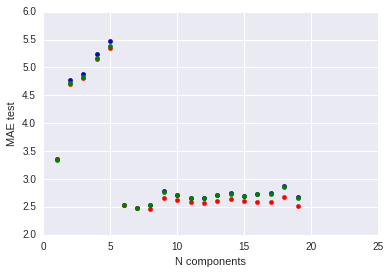

Min MAE 2.48096418849
Min MAE 2.46988698395
Min MAE 2.48428287966


In [260]:
# ACP ne fonctionne bien qu'avec taux de sortie sans bloc
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_sortie_sans_bloc", dft11)
# ACP 
ss = StandardScaler()
df_train_x = ss.fit_transform(df_train_x)
df_test_x = ss.transform(df_test_x)

score = []
score2 = []
score3 = []
for i in range(1, 20):
    pca = PCA(n_components=i)
    pca.fit(df_train_x)
    pca.transform(df_test_x)
    df_train_x_select_features = pca.transform(df_train_x)
    df_test_x_select_features = pca.transform(df_test_x)

    lr = LinearRegression()
    rd = Ridge(100)
    ls = linear_model.Lasso(0.001, normalize=True,random_state=42)
    lr.fit(df_train_x_select_features, df_train_y)
    rd.fit(df_train_x_select_features, df_train_y)
    ls.fit(df_train_x_select_features, df_train_y)
    score.append(metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
    score2.append(metrics.mean_absolute_error(df_test_y, rd.predict(df_test_x_select_features)))
    score3.append(metrics.mean_absolute_error(df_test_y, ls.predict(df_test_x_select_features)))
    plt.scatter(i, metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))
    plt.scatter(i, metrics.mean_absolute_error(df_test_y, rd.predict(df_test_x_select_features)),color="r")
    plt.scatter(i, metrics.mean_absolute_error(df_test_y, ls.predict(df_test_x_select_features)),color="g")
    
plt.xlabel("N components")
plt.ylabel("MAE test")
plt.show()
print("Min MAE %s" % min(score))
print("Min MAE %s" % min(score2))
print("Min MAE %s" % min(score3))

In [261]:
# 2.06 sans bloc avec un decision tree
df_train_x, df_train_y, df_test_x, df_test_y = create_train_and_test("taux_sortie_sans_bloc", dft11)

list_keep = ['D?c?s domicili?s par d?partement', 'taux_centre_sup_moyenne',
'taux_droite_sup_moyenne', 'taux_gauche_sup_moyenne',
'taux_xdroite_sup_moyenne', 'pop_centre', 'Dissident',
'conjoncture travaux publics-opinions sur le carnet de commandes',
'densit?_m?decins']
lr = LinearRegression()

df_train_x_select_features = df_train_x.ix[:, list_keep]
df_test_x_select_features = df_test_x.ix[:, list_keep]

lr.fit(df_train_x_select_features, df_train_y)
print(metrics.mean_absolute_error(df_test_y, lr.predict(df_test_x_select_features)))

2.06852944016


In [21]:
generate_corr_features("taux_bgauche")
generate_corr_features("taux_bdroite")
generate_corr_features("taux_sortie_sans_bloc")
generate_corr_features("taux_sortie_avec_bloc")

In [21]:
generate_corr_features("taux_bgauche")

In [22]:
generate_corr_features("taux_centre")

Sur les 3 approches c'est taux_bgauche qui a le plus de variables discriminante

In [27]:
# En gardant pop_exec
list_prediction(
["var_chomage_annee","taux_xdroite_sup_moyenne",
"pop_xdroite","conjoncture travaux publics-opinions sur le carnet de commandes",
 "pop_exec"],"taux_sortie_avec_bloc")

Index(['var_chomage_annee', 'taux_xdroite_sup_moyenne', 'pop_xdroite',
       'conjoncture travaux publics-opinions sur le carnet de commandes',
       'pop_exec'],
      dtype='object')
R2 train 0.677960145024
R2 adjust train 0.673700358582
MAE train 3.58993232717
MAE test 13.5439469474


Résultat avec fit entire data
R2 train 0.649682115022
R2 adjust train 0.645986778682
MAE train 3.67880891145


In [28]:
list_prediction(
["pop_xgauche","capacit? epargne actuelle (augmentation moins diminution)",
"taux_droite_sup_moyenne","droite_au_pouvoir"],"taux_sortie_sans_bloc")

Index(['pop_xgauche',
       'capacit? epargne actuelle (augmentation moins diminution)',
       'taux_droite_sup_moyenne', 'droite_au_pouvoir'],
      dtype='object')
R2 train 0.614162542253
R2 adjust train 0.61009037911
MAE train 2.800499207
MAE test 5.10689930648


Résultat avec fit entire data
R2 train 0.569221384765
R2 adjust train 0.565593775374
MAE train 2.76921981297


** gauche ** 

In [50]:
## Combinaison taux bgauche 

In [38]:
list_prediction(
["D?c?s domicili?s par d?partement",
"subventions",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"pop_gauche",
"pop_xdroite",
"droite_au_pouvoir",
"persistance_gauche",
"persistance_centre_droite",
"pres_gauche"
],"taux_bgauche")

Index(['D?c?s domicili?s par d?partement', 'subventions',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'taux_xgauche_sup_moyenne', 'pop_gauche', 'pop_xdroite',
       'droite_au_pouvoir', 'persistance_gauche', 'persistance_centre_droite',
       'pres_gauche'],
      dtype='object')
R2 train 0.853862851105
R2 adjust train 0.84872830263
MAE train 1.99379749046
MAE test 2.58859505185e+14


Résultat avec fit entire data
R2 train 0.836148020623
R2 adjust train 0.831577042658
MAE train 2.04427375769


In [53]:
# on conserve le chomage et pop gauche
list_prediction(
["D?c?s domicili?s par d?partement",
"var_chomage_annee",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne","pop_gauche",
"pop_xdroite","droite_au_pouvoir",
"persistance_gauche",
"persistance_centre_droite",
"pres_gauche"
],"taux_bgauche")
# En ne conservant pas la pop_gauche, et utilisans pop_president et cohab moins bon résultat

Index(['D?c?s domicili?s par d?partement', 'var_chomage_annee',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'taux_xgauche_sup_moyenne', 'pop_gauche', 'pop_xdroite',
       'droite_au_pouvoir', 'persistance_gauche', 'persistance_centre_droite',
       'pres_gauche'],
      dtype='object')
R2 train 0.859649790162
R2 adjust train 0.854718566573
MAE train 1.96268944381
MAE test 4.23069650534


Résultat avec fit entire data
R2 train 0.83415409784
R2 adjust train 0.829527495419
MAE train 2.05123876704


In [39]:
list_prediction(
["pop_president",
"cohabitation",
"D?c?s domicili?s par d?partement",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"persistance_gauche",
"persistance_centre_droite",
"pres_gauche",
"pop_verts",
"subventions"
],"taux_bgauche")

Index(['pop_president', 'cohabitation', 'D?c?s domicili?s par d?partement',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'taux_xgauche_sup_moyenne', 'persistance_gauche',
       'persistance_centre_droite', 'pres_gauche', 'pop_verts', 'subventions'],
      dtype='object')
R2 train 0.853973268847
R2 adjust train 0.848842599915
MAE train 1.99443022772
MAE test 2.84839283255


Résultat avec fit entire data
R2 train 0.836148020623
R2 adjust train 0.831577042658
MAE train 2.04427375769


In [28]:
list_prediction_SM(
["pop_president",
"cohabitation",
"D?c?s domicili?s par d?partement",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"persistance_gauche",
"subventions"
],"taux_bgauche")

Résultat avec fit entire data
                            OLS Regression Results                            
Dep. Variable:           taux_bgauche   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     264.5
Date:                Mon, 24 Apr 2017   Prob (F-statistic):          8.30e-186
Time:                        22:41:23   Log-Likelihood:                -1493.8
No. Observations:                 576   AIC:                             3006.
Df Residuals:                     567   BIC:                             3045.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------

In [40]:
list_prediction(
["pop_president",
"cohabitation",
"D?c?s domicili?s par d?partement",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"persistance_gauche",
"persistance_centre_droite",
"pres_gauche",
"pop_verts",
"var_chomage_annee"
],"taux_bgauche")

Index(['pop_president', 'cohabitation', 'D?c?s domicili?s par d?partement',
       'taux_centre_sup_moyenne', 'taux_droite_sup_moyenne',
       'taux_gauche_sup_moyenne', 'taux_xdroite_sup_moyenne',
       'taux_xgauche_sup_moyenne', 'persistance_gauche',
       'persistance_centre_droite', 'pres_gauche', 'pop_verts',
       'var_chomage_annee'],
      dtype='object')
R2 train 0.859649790162
R2 adjust train 0.854718566573
MAE train 1.96268944381
MAE test 2.61259429811


Résultat avec fit entire data
R2 train 0.837593827188
R2 adjust train 0.833063182882
MAE train 2.04627237527


In [30]:
list_prediction_SM(
["pop_president",
"cohabitation",
"D?c?s domicili?s par d?partement",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"persistance_gauche",
"persistance_centre_droite",
"var_chomage_annee"
],"taux_bgauche")

Résultat avec fit entire data
                            OLS Regression Results                            
Dep. Variable:           taux_bgauche   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     247.2
Date:                Mon, 24 Apr 2017   Prob (F-statistic):          1.24e-189
Time:                        22:43:01   Log-Likelihood:                -1481.9
No. Observations:                 576   AIC:                             2984.
Df Residuals:                     566   BIC:                             3027.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------

*On pourrait tester de nouvelles combinaison mais les combinaisons testé avec le taux de sortie avec bloc propose des R2 d'environ 0.6 à 0.7, deplus les combinaisons sont dure à trouver*

** droite **

In [52]:
list_prediction(
[
"var_chomage_annee",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"pop_premier_ministre",
"cohabitation",
"pop_president",
"persistance_gauche",
"pres_gauche",
"conjoncture travaux publics-opinions sur le carnet de commandes"
],"taux_bdroite")

Index(['var_chomage_annee', 'taux_centre_sup_moyenne',
       'taux_droite_sup_moyenne', 'taux_xgauche_sup_moyenne',
       'pop_premier_ministre', 'cohabitation', 'pop_president',
       'persistance_gauche', 'pres_gauche',
       'conjoncture travaux publics-opinions sur le carnet de commandes'],
      dtype='object')
R2 train 0.880705469414
R2 adjust train 0.877507224626
MAE train 2.16666335991
MAE test 8.27781234892


Résultat avec fit entire data
R2 train 0.867581169826
R2 adjust train 0.864757740611
MAE train 2.17788887122


In [50]:
list_prediction(
[
"var_chomage_annee",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"pop_gauche",
"pop_xdroite",
"droite_au_pouvoir",
"persistance_gauche",
"pres_gauche"
],"taux_bdroite")

Index(['var_chomage_annee', 'taux_centre_sup_moyenne',
       'taux_droite_sup_moyenne', 'taux_xgauche_sup_moyenne', 'pop_gauche',
       'pop_xdroite', 'droite_au_pouvoir', 'persistance_gauche',
       'pres_gauche'],
      dtype='object')
R2 train 0.880705469414
R2 adjust train 0.877834745416
MAE train 2.16666335991
MAE test 28.2686026324


Résultat avec fit entire data
R2 train 0.763118500158
R2 adjust train 0.758582471438
MAE train 2.91203184658


**centre**

In [27]:
list_prediction(
[
"pop_exec",
"pres_centre",
"taux_centre_sup_moyenne",
"conjoncture travaux publics-opinions sur le carnet de commandes",
"var_chomage_annee",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"pres_gauche",
"taux_xdroite_sup_moyenne",
],"taux_centre")

Index(['pop_exec', 'pres_centre', 'taux_centre_sup_moyenne',
       'conjoncture travaux publics-opinions sur le carnet de commandes',
       'var_chomage_annee', 'ecart_pop', 'taux_xgauche_sup_moyenne', '75+ans',
       'pres_gauche', 'taux_xdroite_sup_moyenne'],
      dtype='object')
R2 train 0.857977410602
R2 adjust train 0.854169834479
MAE train 1.43072801227
MAE test 5.78837829848


Résultat avec fit entire data
R2 train 0.804044052669
R2 adjust train 0.79986588748
MAE train 1.79174506044


In [28]:
list_prediction(
[
"pop_centre",
"pres_centre",
"taux_centre_sup_moyenne",
"conjoncture travaux publics-opinions sur le carnet de commandes",
"var_chomage_annee",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"pres_gauche",
"taux_xdroite_sup_moyenne",
],"taux_centre")

Index(['pop_centre', 'pres_centre', 'taux_centre_sup_moyenne',
       'conjoncture travaux publics-opinions sur le carnet de commandes',
       'var_chomage_annee', 'ecart_pop', 'taux_xgauche_sup_moyenne', '75+ans',
       'pres_gauche', 'taux_xdroite_sup_moyenne'],
      dtype='object')
R2 train 0.857977410602
R2 adjust train 0.854169834479
MAE train 1.43072801227
MAE test 9.56758118731


Résultat avec fit entire data
R2 train 0.854848983117
R2 adjust train 0.851754078706
MAE train 1.49820123354


In [30]:
list_prediction(
[
"capacit? epargne actuelle (augmentation moins diminution)",
"pres_centre",
"taux_centre_sup_moyenne",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"pres_gauche",
"taux_xdroite_sup_moyenne",
],"taux_centre")

Index(['capacit? epargne actuelle (augmentation moins diminution)',
       'pres_centre', 'taux_centre_sup_moyenne', 'ecart_pop',
       'taux_xgauche_sup_moyenne', '75+ans', 'pres_gauche',
       'taux_xdroite_sup_moyenne'],
      dtype='object')
R2 train 0.852172132077
R2 adjust train 0.849018470895
MAE train 1.4666333517
MAE test 2.55187480446


Résultat avec fit entire data
R2 train 0.851942834742
R2 adjust train 0.849428063357
MAE train 1.519273087


In [53]:
# pres_gauche pas significatif au test de student

In [52]:
# Modèle préfére pour le centre 
list_prediction(
[
"capacite epargne future(am?lioration moins deterioration)",
"pres_centre",
"taux_centre_sup_moyenne",
"conjoncture travaux publics-opinions sur le carnet de commandes",
"var_chomage_annee",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"taux_xdroite_sup_moyenne",
],"taux_centre")

Index(['capacite epargne future(am?lioration moins deterioration)',
       'pres_centre', 'taux_centre_sup_moyenne',
       'conjoncture travaux publics-opinions sur le carnet de commandes',
       'var_chomage_annee', 'ecart_pop', 'taux_xgauche_sup_moyenne', '75+ans',
       'taux_xdroite_sup_moyenne'],
      dtype='object')
R2 train 0.857795983002
R2 adjust train 0.854373961202
MAE train 1.42923735916
MAE test 2.75531080793


Résultat avec fit entire data
R2 train 0.858542450956
R2 adjust train 0.855833689378
MAE train 1.47475637918


In [25]:
list_prediction_SM(
[
"capacite epargne future(am?lioration moins deterioration)",
"pres_centre",
"taux_centre_sup_moyenne",
"conjoncture travaux publics-opinions sur le carnet de commandes",
"var_chomage_annee",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"taux_xdroite_sup_moyenne",
],"taux_centre")

Résultat avec fit entire data
                            OLS Regression Results                            
Dep. Variable:            taux_centre   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     422.3
Date:                Mon, 24 Apr 2017   Prob (F-statistic):          1.55e-244
Time:                        22:38:09   Log-Likelihood:                -1382.3
No. Observations:                 576   AIC:                             2785.
Df Residuals:                     566   BIC:                             2828.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------

In [51]:
list_prediction(
[
"pop_centre",
"pres_centre",
"taux_centre_sup_moyenne",
"subventions",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"taux_xdroite_sup_moyenne",
],"taux_centre")

Index(['pop_centre', 'pres_centre', 'taux_centre_sup_moyenne', 'subventions',
       'ecart_pop', 'taux_xgauche_sup_moyenne', '75+ans',
       'taux_xdroite_sup_moyenne'],
      dtype='object')
R2 train 0.857351196012
R2 adjust train 0.854308021527
MAE train 1.43420840575
MAE test 1.90767624863


Résultat avec fit entire data
R2 train 0.871222421956
R2 adjust train 0.869035117021
MAE train 1.38620439074


In [24]:
list_prediction_SM(
[
"pop_centre",
"pres_centre",
"taux_centre_sup_moyenne",
"subventions",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"taux_xdroite_sup_moyenne",
],"taux_centre")

Résultat avec fit entire data
                            OLS Regression Results                            
Dep. Variable:            taux_centre   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     502.4
Date:                Mon, 24 Apr 2017   Prob (F-statistic):          1.09e-251
Time:                        22:37:43   Log-Likelihood:                -1368.7
No. Observations:                 576   AIC:                             2755.
Df Residuals:                     567   BIC:                             2795.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------

# Modèle Temporaire

In [21]:
features_keep_bgauche = ["D?c?s domicili?s par d?partement",
"var_chomage_annee",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne","pop_gauche",
"pop_xdroite","droite_au_pouvoir",
"persistance_gauche",
"persistance_centre_droite",
"pres_gauche"
]
# Modèle gauche
df_train_x, df_train_y = create_train("taux_bgauche", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep_bgauche]
model_bgauche_final = LinearRegression(fit_intercept=True, normalize=True)
model_bgauche_final.fit(df_train_x_select_features, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [22]:
features_keep_bdroite = ["var_chomage_annee",
"taux_centre_sup_moyenne",
"taux_droite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"pop_premier_ministre",
"cohabitation",
"pop_president",
"persistance_gauche",
"pres_gauche",
"conjoncture travaux publics-opinions sur le carnet de commandes"
]
# Modèle droite
df_train_x, df_train_y = create_train("taux_bdroite", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep_bdroite]
model_bdroite_final = LinearRegression(fit_intercept=True, normalize=True)
model_bdroite_final.fit(df_train_x_select_features, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [23]:
features_keep_bgauche_2 = ["pop_president",
"cohabitation",
"D?c?s domicili?s par d?partement",
"taux_gauche_sup_moyenne",
"taux_xdroite_sup_moyenne",
"taux_xgauche_sup_moyenne",
"persistance_gauche",
"persistance_centre_droite",
"var_chomage_annee"
]
# Modèle gauche v2
df_train_x, df_train_y = create_train("taux_bgauche", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep_bgauche_2]
model_2_bgauche_final = LinearRegression(fit_intercept=True, normalize=True)
model_2_bgauche_final.fit(df_train_x_select_features, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [24]:
features_keep_centre = ["capacite epargne future(am?lioration moins deterioration)",
"pres_centre",
"taux_centre_sup_moyenne",
"conjoncture travaux publics-opinions sur le carnet de commandes",
"var_chomage_annee",
"ecart_pop",
"taux_xgauche_sup_moyenne",
"75+ans",
"taux_xdroite_sup_moyenne"
]
# Modèle centre
df_train_x, df_train_y = create_train("taux_centre", dft11, False)
df_train_x_select_features = df_train_x.ix[:, features_keep_centre]
model_centre_final = LinearRegression(fit_intercept=True, normalize=True)
model_centre_final.fit(df_train_x_select_features, df_train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [25]:
predict_table = pd.read_csv("la_base_2017.csv", encoding="latin1")
predict_table.ix[:,"pop_exec"] = predict_table.ix[:,"pop_premier_ministre"].iloc[0]
predict_table["ecart_pop"] = predict_table["pop_president"] - predict_table["pop_premier_ministre"] 

In [26]:
X_droite = predict_table.ix[:, features_keep_bdroite]
X_gauche = predict_table.ix[:, features_keep_bgauche]
X_gauche_2 = predict_table.ix[:, features_keep_bgauche_2]
X_centre = predict_table.ix[:, features_keep_centre]
y_droite = model_bdroite_final.predict(X_droite)
y_gauche = model_bgauche_final.predict(X_gauche)
y_gauche_2 = model_2_bgauche_final.predict(X_gauche_2)
y_centre = model_centre_final.predict(X_centre)

In [27]:
df=pd.DataFrame(list(zip(y_gauche,y_droite, y_centre,y_gauche_2)),
                columns=['prediction gauche',"prediction droite", "prediction centre", "prediction gauche 2"])

In [28]:
# ouverture table prediction fn
fn_table = pd.read_csv("prediction_2017_xdroite.csv",sep=";", encoding="latin1")

In [29]:
prediction_resultat = pd.concat([fn_table ,df], axis=1)
del prediction_resultat['Unnamed: 0']

In [30]:
prediction_resultat.columns = ['d?partement', 'code','Total', 'prediction xdroite', 
                               'prediction bloc gauche','prediction bloc droite(yc centre)',
                              'prediction centre', 'prediction bloc gauche 2']

In [31]:
#prediction_resultat.to_csv("prediction_2017.csv",sep=";", index=False)

In [32]:
#prediction_resultat["sum"] = prediction_resultat["prediction xdroite"]+\
#prediction_resultat["prediction gauche"]+prediction_resultat["prediction droite"]

In [33]:
prediction_resultat["minus_droite"] = 100 - prediction_resultat["prediction bloc gauche 2"]- prediction_resultat["prediction xdroite"] -  prediction_resultat["prediction centre"] 

In [34]:
#print(np.mean(prediction_resultat["prediction droite"]))
#print(np.mean(prediction_resultat["prediction gauche"]))
#print(np.mean(prediction_resultat["minus_droite"]))
#print(np.mean(prediction_resultat["minus_gauche"]))

In [36]:
vec_weight = prediction_resultat["Total"]
print("Pred pondéré centre %s" % np.average(prediction_resultat["prediction centre"], weights=vec_weight))
print("Pred pondéré bloc gauche %s" % np.average(prediction_resultat["prediction bloc gauche 2"], weights=vec_weight))
print("Pred pondéré xdroite %s" % np.average(prediction_resultat['prediction xdroite'], weights=vec_weight))
print("Pred pondéré droite %s" % np.average(prediction_resultat["minus_droite"], weights=vec_weight))

Pred pondéré centre 10.3163471944
Pred pondéré bloc gauche 40.2550304146
Pred pondéré xdroite 23.4682284888
Pred pondéré droite 25.9603939022


In [37]:
# Calcule des moyennes d'absention par département
rate_abst = pd.DataFrame({'mean_abst' : dft11.groupby(["d?partement"])["taux_Abstention"].mean(),
             "std_abst" : dft11.groupby(["d?partement"])["taux_Abstention"].std()}).reset_index()

In [38]:
prediction_resultat = pd.concat([prediction_resultat  ,rate_abst['mean_abst']], axis=1)

In [40]:
vec_weight = prediction_resultat["Total"]*(1 - prediction_resultat['mean_abst'])
print("Pred pondéré centre %s" % np.average(prediction_resultat["prediction centre"], weights=vec_weight))
print("Pred pondéré bloc gauche %s" % np.average(prediction_resultat["prediction bloc gauche 2"], weights=vec_weight))
print("Pred pondéré xdroite %s" % np.average(prediction_resultat['prediction xdroite'], weights=vec_weight))
print("Pred pondéré droite %s" % np.average(prediction_resultat["minus_droite"], weights=vec_weight))

liste_pred = [np.average(prediction_resultat['prediction xdroite'], weights=vec_weight),
             np.average(prediction_resultat["minus_droite"], weights=vec_weight),
             np.average(prediction_resultat["prediction centre"], weights=vec_weight),
              np.average(prediction_resultat["prediction bloc gauche 2"], weights=vec_weight)]

Pred pondéré centre 10.3753438914
Pred pondéré bloc gauche 40.1309887991
Pred pondéré xdroite 23.5008188048
Pred pondéré droite 25.9928485046


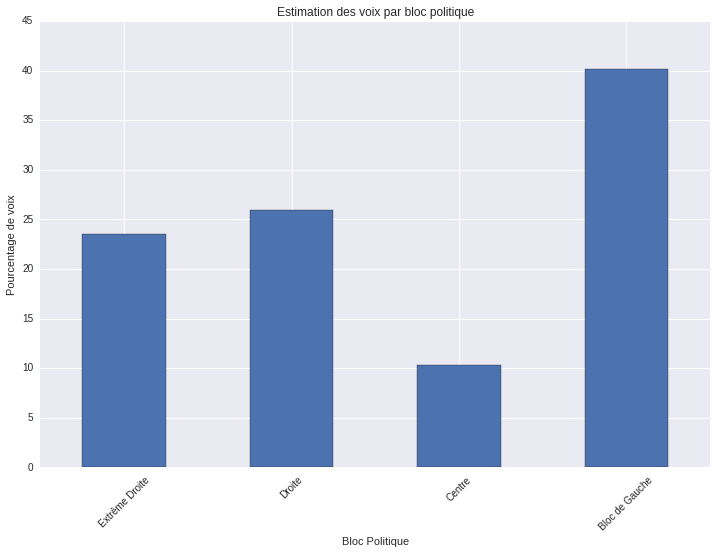

In [59]:
names = ["Extrême Droite","Droite", "Centre", "Bloc de Gauche"]
freq_series = pd.Series.from_array(liste_pred)

# now to plot the figure...
plt.figure(figsize=(12, 8))
ax = freq_series.plot(kind='bar')
ax.set_title("Estimation des voix par bloc politique")
ax.set_xlabel("Bloc Politique")
ax.set_ylabel("Pourcentage de voix")
ax.set_xticklabels(names, rotation=45)
plt.show()

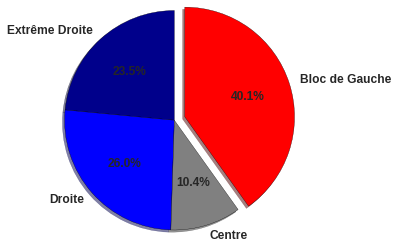

In [94]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode = (0, 0, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

names = ["Extrême Droite","Droite", "Centre", "Bloc de Gauche"]
cs = ["darkblue","blue", "gray","red"]
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(liste_pred, explode=explode, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=cs)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
for i in range(len(texts)):
    texts[i].set_fontsize(12)
    texts[i].set_weight('bold')
    autotexts[i].set_fontsize(12)
    autotexts[i].set_weight('bold')
    
plt.savefig('pie.png')
plt.show()

In [315]:
dict_color = {
"MLP" :"darkblue", "Fillon":"blue", 
"Macron":"gray","Melanchon":"red"
}

dict_color_2 = {
"MLP" :"darkblue", "Fillon":"blue", 
"Macron":"lightcoral","Melanchon":"lightcoral"
}

In [317]:
def generate_table_dept(ponderation, prediction_resultat):
    table_dept_candidat = prediction_resultat.loc[:, ["d?partement", "code","prediction xdroite","prediction centre",
                                           "prediction bloc gauche 2", "minus_droite"]]
    
    # Pondération par sondage
    table_dept_candidat.loc[:,"MLP"] = table_dept_candidat.loc[:,"prediction xdroite"] *ponderation["MLP"]/100
    table_dept_candidat.loc[:,"Asselineau"] = table_dept_candidat.loc[:,"minus_droite"]*ponderation["Asselineau"]/ 100
    table_dept_candidat.loc[:,"Dupont Aignan"] = table_dept_candidat.loc[:,"minus_droite"]*ponderation["Dupont Aignan"]/ 100
    table_dept_candidat.loc[:,"lassalle"] = table_dept_candidat.loc[:,"minus_droite"]*ponderation["lassalle"]/ 100
    table_dept_candidat.loc[:,"Fillon"] = table_dept_candidat.loc[:,"minus_droite"]*ponderation["Fillon"]/ 100
    table_dept_candidat.loc[:,"Macron"] = table_dept_candidat.loc[:,"prediction bloc gauche 2"]*ponderation["Macron"]/ 100
    table_dept_candidat.loc[:,"Hamon"] = table_dept_candidat.loc[:,"prediction bloc gauche 2"]*ponderation["Hamon"]/ 100
    table_dept_candidat.loc[:,"Melanchon"] = table_dept_candidat.loc[:,"prediction bloc gauche 2"]*ponderation["Melanchon"]/ 100
    table_dept_candidat.loc[:,"Poutou"] = table_dept_candidat.loc[:,"prediction bloc gauche 2"]*ponderation["Poutou"]/ 100
    table_dept_candidat.loc[:,"Arthaud"] = table_dept_candidat.loc[:,"prediction bloc gauche 2"]*ponderation["Arthaud"]/ 100
    table_dept_candidat.loc[:,"cheminade"] = table_dept_candidat.loc[:,"prediction bloc gauche 2"]*ponderation["cheminade"]/ 100

    # Transfert de voix centre
    table_dept_candidat.loc[:,"MLP"]  = table_dept_candidat.loc[:,"MLP"] + (table_dept_candidat.loc[:,"prediction centre"]*6.5/100)
    table_dept_candidat.loc[:,"Asselineau"]  = table_dept_candidat.loc[:,"Asselineau"] + (table_dept_candidat.loc[:,"prediction centre"]*0.25/100)
    table_dept_candidat.loc[:,"Dupont Aignan"]  = table_dept_candidat.loc[:,"Dupont Aignan"] + (table_dept_candidat.loc[:,"prediction centre"]*5.5/100)
    table_dept_candidat.loc[:,"lassalle"]  = table_dept_candidat.loc[:,"lassalle"] + (table_dept_candidat.loc[:,"prediction centre"]*1.75/100)
    table_dept_candidat.loc[:,"Fillon"]  = table_dept_candidat.loc[:,"Fillon"] + (table_dept_candidat.loc[:,"prediction centre"]*20.25/100)
    table_dept_candidat.loc[:,"Macron"]  = table_dept_candidat.loc[:,"Macron"] + (table_dept_candidat.loc[:,"prediction centre"]*46/100)
    table_dept_candidat.loc[:,"Hamon"]  = table_dept_candidat.loc[:,"Hamon"] + (table_dept_candidat.loc[:,"prediction centre"]*5.75/100)
    table_dept_candidat.loc[:,"Melanchon"]  = table_dept_candidat.loc[:,"Melanchon"] + (table_dept_candidat.loc[:,"prediction centre"]*12/100)
    table_dept_candidat.loc[:,"Poutou"]  = table_dept_candidat.loc[:,"Poutou"] + (table_dept_candidat.loc[:,"prediction centre"]*1.75/100)
    table_dept_candidat.loc[:,"Arthaud"]  = table_dept_candidat.loc[:,"Arthaud"] + (table_dept_candidat.loc[:,"prediction centre"]*0.25/100)
    table_dept_candidat.loc[:,"cheminade"]  = table_dept_candidat.loc[:,"cheminade"] + (table_dept_candidat.loc[:,"prediction centre"]*0/100)
    
    table_dept_candidat["code"] = table_dept_candidat["code"].apply(lambda x:  "0"+str(x) if len(str(x))==1 else str(x))
    
    sub = table_dept_candidat.ix[: ,["MLP","Asselineau","Dupont Aignan",
                             "lassalle", "Fillon", "Macron", "Hamon", 
                             "Melanchon", "Poutou", "Arthaud", "cheminade"]]
    
    table_dept_candidat["winner"] = sub.idxmax(axis=1)
    
    return table_dept_candidat

In [318]:
def lambert932WGPS(lambertE, lambertN):

    class constantes:
        GRS80E = 0.081819191042816
        LONG_0 = 3
        XS = 700000
        YS = 12655612.0499
        n = 0.7256077650532670
        C = 11754255.4261

    delX = lambertE - constantes.XS
    delY = lambertN - constantes.YS
    gamma = math.atan(-delX / delY)
    R = math.sqrt(delX * delX + delY * delY)
    latiso = math.log(constantes.C / R) / constantes.n
    sinPhiit0 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * math.sin(1)))
    sinPhiit1 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit0))
    sinPhiit2 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit1))
    sinPhiit3 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit2))
    sinPhiit4 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit3))
    sinPhiit5 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit4))
    sinPhiit6 = math.tanh(latiso + constantes.GRS80E * math.atanh(constantes.GRS80E * sinPhiit5))

    longRad = math.asin(sinPhiit6)
    latRad = gamma / constantes.n + constantes.LONG_0 / 180 * math.pi

    longitude = latRad / math.pi * 180
    latitude = longRad / math.pi * 180

    return longitude, latitude


In [319]:
def generate_graph(label, table_dept_candidat, dict_color):
    fig = plt.figure(figsize=(20,10))
    #Custom adjust of the subplots
    #plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
    ax = plt.subplot(111)
    #Let's create a basemap of Europe
    x1 = -5.0
    x2 = 12.
    y1 = 40.
    y2 = 54.

    m = Basemap(resolution='i',projection='merc', llcrnrlat=y1,urcrnrlat=y2,llcrnrlon=x1,urcrnrlon=x2,lat_ts=(x1+x2)/2)
    m.drawcountries(linewidth=0.5)
    m.drawcoastlines(linewidth=0.5)
    if False:
        # provoque l'erreur
        # ValueError: All values in the dash list must be positive
        m.drawparallels(np.arange(y1,y2,2.),labels=[1,0,0,0],color='black',
                        dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw parallels
        m.drawmeridians(np.arange(x1,x2,2.),labels=[0,0,0,1],color='black',
                        dashes=[1,0],labelstyle='+/-',linewidth=0.2) # draw meridians

    shp = 'carte_file/DEPARTEMENT.shp'
    r = shapefile.Reader(shp)
    shapes = r.shapes()
    records = r.records()



    for record, shape in zip(records,shapes):
        # les coordonnées sont en Lambert 93
        geo_points = [lambert932WGPS(x,y) for x, y in shape.points]
        lons = [_[0] for _ in geo_points]
        lats = [_[1] for _ in geo_points]
        data = np.array(m(lons, lats)).T

        if len(shape.parts) == 1:
            segs = [data,]
        else:
            segs = []
            for i in range(1,len(shape.parts)):
                index = shape.parts[i-1]
                index2 = shape.parts[i]
                segs.append(data[index:index2])
            segs.append(data[index2:])

        lines = LineCollection(segs,antialiaseds=(1,))
        # pour changer les couleurs c'est ici, il faudra utiliser le champ records
        # pour les changer en fonction du nom du départements
        code_dept = record[1]
        name_winner = table_dept_candidat.ix[table_dept_candidat["code"]==code_dept, "winner"]
        color_winner = dict_color[name_winner.values[0]]
        lines.set_facecolors(color_winner)
        lines.set_edgecolors('k')
        lines.set_linewidth(1)
        ax.add_collection(lines)


    plt.title("Prediction du vainqueur par département (Aggrégation par "+ label +" )")
    plt.savefig("carte_export//carte_france_"+label+".png")
    plt.close()



    fig = plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    m = Basemap(projection='tmerc', 
                  lat_0=48.8534, lon_0= 2.3488,
                  width=2e5, height=2e5)

    m.drawcoastlines(linewidth=0.5)
    m.drawcountries(linewidth=0.5)
    shp = 'carte_file/DEPARTEMENT.shp'
    r = shapefile.Reader(shp)
    shapes = r.shapes()
    records = r.records()



    for record, shape in zip(records,shapes):
        if record[1] in ["75","94","95","93","92","77","78","91"]:
            # les coordonnées sont en Lambert 93
            geo_points = [lambert932WGPS(x,y) for x, y in shape.points]
            lons = [_[0] for _ in geo_points]
            lats = [_[1] for _ in geo_points]
            data = np.array(m(lons, lats)).T

            if len(shape.parts) == 1:
                segs = [data,]
            else:
                segs = []
                for i in range(1,len(shape.parts)):
                    index = shape.parts[i-1]
                    index2 = shape.parts[i]
                    segs.append(data[index:index2])
                segs.append(data[index2:])

            lines = LineCollection(segs,antialiaseds=(1,))
            # pour changer les couleurs c'est ici, il faudra utiliser le champ records
            # pour les changer en fonction du nom du départements
            code_dept = record[1]
            name_winner = table_dept_candidat.ix[table_dept_candidat["code"]==code_dept, "winner"]
            color_winner = dict_color[name_winner.values[0]]
            lines.set_facecolors(color_winner)
            lines.set_edgecolors('k')
            lines.set_linewidth(1)
            ax.add_collection(lines)

    plt.savefig("carte_export//carte_idf_"+label+".png")        
    plt.close()

In [323]:
ponderation_sondage = {
"MLP": 100,
"Asselineau" : 2.0408163265,
"Dupont Aignan" : 16.3265306122,
"lassalle" : 4.0816326531,
"Fillon": 77.5510204082,
"Macron": 44.2307692308,
"Hamon" : 16.3461538462,
"Melanchon" : 35.5769230769,
"Poutou": 2.8846153846,
"Arthaud" : 0.9615384615,
"cheminade" : 0
}

ponderation_twitter ={
"MLP": 100,
"Asselineau" : 0.80,
"Dupont Aignan" : 14.13,
"lassalle" : 0.2965,
"Fillon": 84.71,
"Macron": 39.68,
"Hamon" : 16.92,
"Melanchon" : 39.32,
"Poutou": 4.06,
"Arthaud" : 2.16,
"cheminade" : 0.054
}

ponderation_google = {
"MLP": 100,
"Asselineau" : 12.88,
"Dupont Aignan" : 6.59,
"lassalle" : 11.14,
"Fillon": 65.07,
"Macron": 32.55,
"Hamon" : 2.93,
"Melanchon" : 54.23,
"Poutou": 8.11,
"Arthaud" : 2.16,
"cheminade" : 4.30
}

ponderation_trois = {
"MLP": 100,
"Asselineau" : 5.89,
"Dupont Aignan" : 11.57,
"lassalle" : 5.25,
"Fillon": 75.82,
"Macron": 38.70,
"Hamon" : 11.65,
"Melanchon" : 43.31,
"Poutou": 5.09,
"Arthaud" : 1.03,
"cheminade" : 1.66 
}


In [322]:
# Sondage
table_dept = generate_table_dept( ponderation_sondage ,prediction_resultat)
generate_graph("Sondage", table_dept, dict_color)
# Twitter
table_dept = generate_table_dept( ponderation_twitter ,prediction_resultat)
generate_graph("Twitter", table_dept, dict_color)
# Google
table_dept = generate_table_dept( ponderation_google ,prediction_resultat)
generate_graph("Google", table_dept, dict_color)

In [ ]:
table_dept = generate_table_dept( ponderation_trois ,prediction_resultat)
generate_graph("Average", table_dept, dict_color_2)